In [46]:
import h5py
import numpy as np
from chunkflow.chunk import Chunk

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
from skimage.transform import resize
from skimage import color
from skimage import segmentation


def scale_data(vol, seg, size=180):
    length = vol.shape[0]
    vol = resize(vol, (length, size, size))
    seg = resize(seg, (length, size, size), order=0, preserve_range=True, anti_aliasing=False)

    return (vol, seg)
    
def label_data(vol, seg):
    length = vol.shape[0]
    size = vol.shape[1]
    # reshape for labeling
    seg = np.reshape(seg, (size, length*size) )
    vol = np.reshape(vol, (size, length*size) )
    # label
    labeled = color.label2rgb(seg, vol, alpha=0.2, bg_label=-1)
    # shape back
    labeled = np.reshape(labeled, (length, size, size, 3) )

    return labeled


In [48]:
import matplotlib.pyplot as plt
import time
import IPython

%matplotlib inline

def vis_volume(volume):
    length = volume.shape[0]
    
    # set up
    fig = plt.figure()
    axes = fig.add_subplot()
    hfig = display(fig, display_id=True)

    # display
    for i in range(length):
        axes.imshow(volume[i], interpolation='none', filternorm=False, resample=False)
        fig.canvas.draw()
        hfig.update(fig)
        if i != length-1:
            plt.cla()
    # clean up
    IPython.display.clear_output()

In [8]:
# load datasets
fileA = './data/cremi/sample_A.hdf'

volA = Chunk.from_h5(fileA, dataset_path='volumes/raw')
segA = Chunk.from_h5(fileA, dataset_path='volumes/labels/neuron_ids')

read from HDF5 file: ./data/cremi/sample_A.hdf
global offset: None


NameError: name 'fileB' is not defined

In [43]:
scaledVolA, scaledSegA = scale_data(volA, segA)
labeledVolA = label_data(scaledVolA, scaledSegA)

In [ ]:
vis_volume(scaledVolA)
vis_volume(labeledVolA)

In [325]:
from dataset.segmentation import CremiDataset
from dataset.ground_truth_volume import *

patch_size = 64
dataset = CremiDataset(patch_size=patch_size)

read from HDF5 file: ./data/cremi/sample_A.hdf
global offset: None
read from HDF5 file: ./data/cremi/sample_A.hdf
global offset: None


center:  (52, 919, 1118)
init shape:  (68, 68, 68) (68, 68, 68)
cur label shape (1, 1, 68, 68, 68)
patch shape:  (1, 1, 68, 68, 68)
(68, 68, 68) (68, 68, 68)


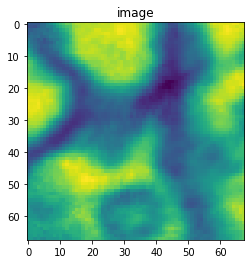

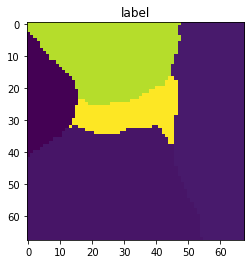

In [331]:
patch = dataset.random_training_patch
image = np.squeeze(patch.image)
label = np.squeeze(patch.label)
print(image.shape, label.shape)
i = 5
plt.imshow(image[i])
plt.title("image")
plt.show()
plt.imshow(label[i])
plt.title("label")
plt.show()

# for i in range(image.shape[0]):
#     print(image[i])

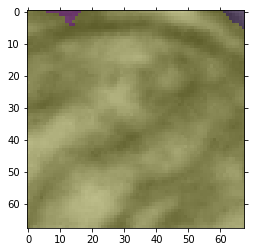

In [313]:
patch = dataset.random_training_patch
image = np.squeeze(patch.image)
label = np.squeeze(patch.label)
labeledPatch = label_data(image, label)
vis_volume(labeledPatch)